# Project 2E

**Scientific Question**: How does cancer stem cells relate to the overall state of the tumor in patients?

Cancer stem cells(CSC) are a subpopulation of tumor cells that harbor characteristics similar to stem cells such as self-renewal, differentiation, and tumor initiation. Thus, CSCs play a significant role in theraputic resistance and tumor recurrence. 

CSCs have been identified as a significant factor in tumor therapy for multiple cancer types. The mRNA expression-based stemness index or "mRNAsi is an index that describes the degree of similarity between tumor cells and stem cells and can be considered a quantitative representation of CSCs (Pan et al., 2019)" mRNAsi data for different types of cancers can be retrieved from The Cancer Genome Atlas (TCGA) which is cancer genomics program that aims to provide genetic mutations that contribute to the formation of over 200 different types of cancer. 

**Sceintific Hypothesis**:If cancer stem cells promote cancer cell survival and recurrence, then lower amount of CSCs in a certain tumor means generally better outcomes for that patient

CSC quanitification can be done by analyzing the mRNASi index of the tumor sample. mRNAsi can be retrienved from TCGA databse. Although it's free to use, to download data, you have to request beforehand. So I found an NCBI article (1) that had their mRNAsi data on an excel spreadsheet, created my own to condense the information and uploaded onto Jupyter so that it can be acessed on this notebook. However, I couldn't find correlating data on the stages of cancer or overall survival rate correlated to the mRNAsi data so I assigned random values from 0~4 on the excel spreadsheet. This will not give me any kind of significant data to anaylze but I couldn't find any useful data.

(1)Malta, Tathiane M et al. “Machine Learning Identifies Stemness Features Associated with Oncogenic Dedifferentiation.” Cell vol. 173,2 (2018): 338-354.e15. doi:10.1016/j.cell.2018.03.034

**Part 1: Loading Packages**

- panda: python package that can create 2-dimensional, size-mutable dataframe with labeled rows and columns. Can be used by matplotlib to visualize the dataframe
- numpy: python package similar to panda dataframe. Creates multi-dimensional arrays, matrices, and other related mathematical functions. Can also be used by matplotlib to visualize arrays
- matplotlib: python library for using input data to plot and visualize 

In [71]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

**Part 2: Performing Bioinformatics Analysis**

The heatplot is supposed to show the relationship between mRNAsi data and the corresponding cancer type to show that across different cancer types, there is a constant positive relationship between the two. 

The excel sheet is a condesnsed version of mRNAsi values and cancer types from a NCBI article(1)

In the code below, the excel sheet is divided up into different dataframes for each cancer type and their mRNAsi data. (This is because there's some data that I didn't want to include) Then the dataframes are combined 

(1)Malta, Tathiane M et al. “Machine Learning Identifies Stemness Features Associated with Oncogenic Dedifferentiation.” Cell vol. 173,2 (2018): 338-354.e15. doi:10.1016/j.cell.2018.03.034

In [102]:
#Read the excel file and save as mRNAsi panda dataframe 
mRNAsi = pd.read_excel("2E.xlsx")

#separate different types of cancer in one excel file and assign to separate dataframe
GBM = mRNAsi.loc[:53,["mRNAsi","Stages"]].to_numpy()
OV = mRNAsi.loc[78:131, ["mRNAsi","Stages"]].to_numpy()
LAML = mRNAsi.loc[493:546, ["mRNAsi","Stages"]].to_numpy()
TGCT = mRNAsi.loc[171:224, ["mRNAsi","Stages"]].to_numpy()
BRCA = mRNAsi.loc[257:310,["mRNAsi","Stages"]].to_numpy()


#combined mRNAsi data into multi-dimensional array
comb_mRNAsi = np.array([[GBM],
               [OV],
               [LUAD],
               [TGCT],
               [BRCA]], dtype = object)
print(comb)

[[      mRNAsi  Stages
0   0.239843       1
1   0.187830       3
2   0.408749       3
3   0.349145       3
4   0.249841       0
5   0.290712       0
6   0.214938       3
7   0.420250       0
8   0.229151       2
9   0.272068       4
10  0.251920       0
11  0.234050       3
12  0.299278       2
13  0.251861       3
14  0.281116       2
15  0.310930       1
16  0.243398       2
17  0.310621       1
18  0.180339       4
19  0.353419       4
20  0.393702       3
21  0.261613       0
22  0.298758       0
23  0.177315       0
24  0.151890       2
25  0.205321       4
26  0.241576       2
27  0.273362       1
28  0.356912       2
29  0.242382       2
30  0.368071       1
31  0.417139       0
32  0.371149       2
33  0.230865       4
34  0.223213       3
35  0.282280       3
36  0.200798       0
37  0.401431       3
38  0.362409       1
39  0.401086       2
40  0.379669       1
41  0.335177       4
42  0.249292       3
43  0.314464       3
44  0.283640       3
45  0.264925       4
46  0.29825

**Part 3: Plotting the Results**

The goal is to use matplotlib to create a heatplot. The x-axis will be the cancer stages (0~4) and the y-axis will represent mRNAsi values for the different types of cancer. A color bar, ticks, and title will be added in the visualized plot. I thought a heatmap would be appropriate because even though it's a 2D plot, it can take in more than just two variables (no set number of y-axis categories, or cancer types) and be used to examine a common pattern for multiple types of cancers in relation to their mRNAsi scores and the stages of cancer. 

TypeError: Image data of dtype object cannot be converted to float

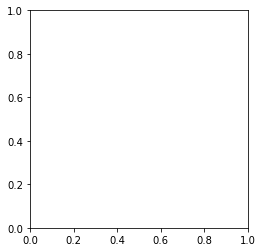

In [103]:
#Assigning names to arrays
cancer = ["GBM", "OV", "LMAL", "TGCT", "BRCA"]
stages = ["stage 0", "stage 1", "stage 2", "stage 3", "stage 4"]


fig, ax = plt.subplots()
im = ax.imshow(comb_mRNAsi)

#Show ticks for axis
ax.set_xticks(np.arange(len(stages)))
ax.set_yticks(np.arange(len(cancer)))

#label ticks for the axis
ax.set_xticklabels(stages)
ax.set_yticklabels(cancer)

#Rotating the ticks
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

#colorbar
cbar = ax.figure.colorbar(im)

#set title and show the heatplot
plt.title("mRNAsi levels and stages of cancer")
plt.show()

**Part 4: Analyzing the Results**

There was something wrong with how I did my heat plot and it didn't run correctly. If there was something on the graph though, I had random numbers set as my stages for mRNAsi values so there wouldn't have been significant values as I hoped. From the articles I found, there seemed to have been significant correlation between mRNAsi values and the stages of a certain type of cancer or the patient's overall survival rate (measured in days). Ideally I would've found corresponding data on either of the two values mentioned along with the mRNAsi data. And the heatplot would've hopefully shown a common pattern of higher mRNAsi values and higher stages of cancer (or lower survival rate) shown by darker colors. 

"Lower corrected mRNAsi scores had better survival and treatment outcomes[...]Corrected mRNAsi in BLCA increased as tumor stage increased... (Pan et al., 2019)"

"...clinical features and outcomes were highly correlated with the mRNAsi... (Liao et al., 2020)

"These key genes were found to have strong correlations as a whole, and could be used as therapeutic targets in the treatment of LUAD, by inhibiting the stemness features (Zhang et al., 2020)"